##TelecomX_LATAM_2

#🛠️ Preparación de los Datos

Extracción del Archivo Tratado

Descripción

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [2]:
import pandas as pd
import numpy as np


In [18]:
datos_tratados = pd.read_csv('datos_tratados.csv')
datos_tratados

,ID_Cliente,Evasion,Costo_Diario,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cantidad_Servicios
0,0002-ORFBO,0.0,2.186667,Female,0.0,Yes,Yes,9.0,1,0,DSL,0,1,0,1,1,0,One year,Yes,Mailed check,65.60,593.30,4
1,0003-MKNFE,0.0,1.996667,Male,0.0,No,No,9.0,1,1,DSL,0,0,0,0,0,1,Month-to-month,No,Mailed check,59.90,542.40,3
2,0004-TLHLJ,1.0,2.463333,Male,0.0,No,No,4.0,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,Yes,Electronic check,73.90,280.85,2
3,0011-IGKFF,1.0,3.266667,Male,1.0,Yes,No,13.0,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,Yes,Electronic check,98.00,1237.85,5
4,0013-EXCHZ,1.0,2.796667,Female,1.0,Yes,No,3.0,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,Yes,Mailed check,83.90,267.40,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,NaN,NaN,NaN,Female,1.0,No,No,1.0,0,0,DSL,0,0,0,0,0,0,Month-to-month,No,Mailed check,25.05,25.05,0
7252,NaN,NaN,NaN,Female,0.0,No,No,15.0,1,0,DSL,1,1,1,1,1,1,Month-to-month,No,Mailed check,84.45,1287.85,7
7253,NaN,NaN,NaN,Male,0.0,No,No,32.0,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,Yes,Bank transfer (automatic),85.65,2664.30,3
7254,NaN,NaN,NaN,Male,0.0,Yes,No,69.0,0,0,DSL,0,1,1,1,1,1,One year,Yes,Credit card (automatic),60.80,4263.40,5


Eliminación de Columnas Irrelevantes

Descripción

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [21]:
# --- Eliminación de la Columna ID_Cliente ---
#
# Se elimina la columna 'ID_Cliente' del DataFrame 'df_final' porque es un identificador único
# y no aporta información útil para los modelos de predicción.
# El resultado se guarda en un nuevo DataFrame llamado 'df_final_sin_id'.
df_final_sin_id = datos_tratados.drop('ID_Cliente', axis=1)

# --- Configuración de Visualización y Muestra de Datos ---
#
# Se ajustan las opciones de visualización de pandas para asegurar que se muestren
# todas las columnas ('display.max_columns') y que la salida tenga un ancho suficiente
# para evitar saltos de línea ('display.width').
# Finalmente, se imprime la cabecera (las primeras 5 filas) del nuevo DataFrame
# para verificar que la columna 'ID_Cliente' ha sido eliminada.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df_final_sin_id.head())

   Evasion  Costo_Diario  gender  SeniorCitizen Partner Dependents  tenure  PhoneService  MultipleLines InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies        Contract PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  Cantidad_Servicios
0      0.0      2.186667  Female            0.0     Yes        Yes     9.0             1              0             DSL               0             1                 0            1            1                0        One year              Yes      Mailed check             65.6         593.30                   4
1      0.0      1.996667    Male            0.0      No         No     9.0             1              1             DSL               0             0                 0            0            0                1  Month-to-month               No      Mailed check             59.9         542.40                   3
2      1.0      2.463333    Male            0.0      No   

Encoding

Descripción

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder:
Artículo en Alura sobre codificación categórica

In [22]:
# --- Encoding (One-Hot) ---
#
# Se transforman todas las columnas categóricas restantes a formato numérico (0 y 1)
# utilizando la técnica de one-hot encoding con `pd.get_dummies`.
# `drop_first=True` ayuda a evitar redundancia en los datos.
df_encoded = pd.get_dummies(df_final_sin_id, drop_first=True, dtype=int)

In [23]:
# --- Visualización del Resultado Final ---
#
# Se imprimen las primeras 5 filas del DataFrame final ya codificado
# para verificar visualmente que todas las transformaciones se aplicaron correctamente.
print("DataFrame después de aplicar One-Hot Encoding:")
print(df_encoded.head())

DataFrame después de aplicar One-Hot Encoding:
   Evasion  Costo_Diario  SeniorCitizen  tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Charges.Monthly  Charges.Total  Cantidad_Servicios  gender_Male  Partner_Yes  Dependents_Yes  InternetService_Fiber optic  InternetService_No  Contract_One year  Contract_Two year  PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0      0.0      2.186667            0.0     9.0             1              0               0             1                 0            1            1                0             65.6         593.30                   4            0            1               1                            0                   0                  1                  0                     1                                      0                               0                           1
1      0.0   

In [24]:
# --- Información Detallada del DataFrame Final ---
#
# Se genera un resumen personalizado, similar a .info(), para mostrar la estructura final:
# el número de entradas, la cantidad de columnas, y el tipo de dato de cada una,
# confirmando que todos los datos son ahora numéricos.
print("\nInformación del nuevo DataFrame (df_encoded):")
print(f"Index: {len(df_encoded)} entries, {df_encoded.index[0]} to {df_encoded.index[-1]}")
print(f"Data columns (total {df_encoded.shape[1]} columns):")
print("---  ------                                  --------------  -----")
print("#   Column                                  Non-Null Count  Dtype")
print("---  ------                                  --------------  -----")
for i, col in enumerate(df_encoded.columns):
    non_null_count = df_encoded[col].count()
    dtype = df_encoded[col].dtype
    # Se usa formato con padding para alinear las columnas
    print(f"{i:<3} {col:<40} {non_null_count:<15} {str(dtype)}")


Información del nuevo DataFrame (df_encoded):
Index: 7256 entries, 0 to 7255
Data columns (total 26 columns):
---  ------                                  --------------  -----
#   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
0   Evasion                                  7043            float64
1   Costo_Diario                             7043            float64
2   SeniorCitizen                            7043            float64
3   tenure                                   7043            float64
4   PhoneService                             7256            int64
5   MultipleLines                            7256            int64
6   OnlineSecurity                           7256            int64
7   OnlineBackup                             7256            int64
8   DeviceProtection                         7256            int64
9   TechSupport                              7256            int64
10  Streami

Verificación de la Proporción de Cancelación (Churn)

Descripción

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporción:
Documentación oficial de value_counts()

In [25]:
# --- Conteo Absoluto de Evasión ---
#
# En esta sección se calcula el número total de clientes para cada categoría de la columna 'Evasion'.
# El método .value_counts() cuenta las apariciones de cada valor único (0 para 'No' y 1 para 'Sí').
# Luego, .to_string() se usa para imprimir el resultado de forma limpia, sin la línea de metadatos (dtype).
print("--- Conteo de Clientes por Evasión ---")
conteo_evasion = df_encoded['Evasion'].value_counts()
print(conteo_evasion.to_string())
print("-" * 40)

# --- Proporción Porcentual de Evasión ---
#
# Aquí se calcula el porcentaje que representa cada categoría sobre el total de clientes.
# El parámetro 'normalize=True' calcula la proporción (ej. 0.73), y al multiplicar por 100 se convierte a porcentaje.
# Finalmente, .round(2) redondea el resultado a dos decimales para una mejor presentación.
print("\n--- Proporción de Clientes por Evasión (%) ---")
proporcion_evasion = df_encoded['Evasion'].value_counts(normalize=True) * 100
print(proporcion_evasion.round(2).to_string())

--- Conteo de Clientes por Evasión ---
Evasion
0.0    5174
1.0    1869
----------------------------------------

--- Proporción de Clientes por Evasión (%) ---
Evasion
0.0    73.46
1.0    26.54


Balanceo de Clases (opcional)

Descripción

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

🔎 Sugerencia:
Puedes leer más sobre cómo manejar el desbalanceo de clases en este artículo:
Artículo en Alura sobre desbalanceo de datos

In [26]:
# --- Importación de la Librería Necesaria ---
#
# Se importa la clase SMOTE (Synthetic Minority Over-sampling Technique) de la librería
# 'imblearn', que es la herramienta que se utilizará para balancear el conjunto de datos.
from imblearn.over_sampling import SMOTE

# Se asume que 'df_encoded' ya existe y está procesado

# --- Limpieza de Valores Nulos en la Variable Objetivo ---
#
# Es un paso crucial de pre-procesamiento. Se eliminan las filas donde la columna 'Evasion'
# contiene valores nulos (NaN), ya que SMOTE no puede trabajar con datos objetivo faltantes.
df_encoded_clean = df_encoded.dropna(subset=['Evasion'])

# --- Separación de Características (X) y Variable Objetivo (y) ---
#
# Se divide el DataFrame en dos:
# X: Contiene todas las columnas que servirán como características para el modelo (todas menos 'Evasion').
# y: Contiene únicamente la columna objetivo ('Evasion') que queremos predecir.
X = df_encoded_clean.drop('Evasion', axis=1)
y = df_encoded_clean['Evasion']

# --- Imputación de Valores Nulos en las Características ---
#
# Se rellenan los posibles valores nulos (NaN) que puedan existir en las columnas de características (X).
# Se utiliza la mediana de cada columna para rellenar los vacíos, ya que es una medida robusta.
X_imputed = X.fillna(X.median())


# --- Verificación del Conteo de Clases (Antes del Balanceo) ---
#
# Se imprime el conteo de cada clase (0 y 1) para mostrar el desbalance
# que existe en los datos antes de aplicar la técnica de sobremuestreo.
print("--- Conteo de Clases ANTES de SMOTE ---")
print(y.value_counts().to_string())
print("-" * 40)

# --- Aplicación de la Técnica SMOTE ---
#
# Se crea una instancia de SMOTE. 'random_state=42' se usa para que los resultados sean siempre los mismos.
# Luego, .fit_resample() se aplica a los datos para crear nuevos ejemplos sintéticos de la clase minoritaria (1),
# hasta que el número de muestras sea igual al de la clase mayoritaria (0).
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_imputed, y)

# --- Verificación del Conteo de Clases (Después del Balanceo) ---
#
# Se imprime el conteo de clases después de aplicar SMOTE para confirmar
# que ambas clases ahora tienen el mismo número de muestras, logrando un dataset balanceado.
print("\n--- Conteo de Clases DESPUÉS de SMOTE ---")
print(y_res.value_counts().to_string())

--- Conteo de Clases ANTES de SMOTE ---
Evasion
0.0    5174
1.0    1869
----------------------------------------

--- Conteo de Clases DESPUÉS de SMOTE ---
Evasion
0.0    5174
1.0    5174


Normalización o Estandarización (si es necesario)

Descripción

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

🔎 Sugerencia:
Puedes leer más sobre normalización y estandarización de datos en este artículo:
Artículo en Medium sobre normalización y estandarización en Machine Learning

In [27]:
# --- Importación de la Librería Necesaria ---
#
# Se importa la clase StandardScaler de la librería scikit-learn.
# Esta herramienta se utiliza para estandarizar las características del conjunto de datos.
from sklearn.preprocessing import StandardScaler

# Se asume que ya existen los DataFrames balanceados X_res y y_res

# --- 1. Creación de la Instancia del Escalador ---
#
# Se crea un objeto de la clase StandardScaler que se utilizará
# para realizar la estandarización de los datos.
scaler = StandardScaler()

# --- 2. Ajuste y Transformación de los Datos ---
#
# El método .fit_transform() realiza dos acciones:
#   - fit: Calcula la media y la desviación estándar de cada columna en X_res.
#   - transform: Aplica la estandarización (z-score) a los datos, usando los valores calculados.
# Este proceso se aplica solo a las características (X_res), nunca a la variable objetivo (y).
X_scaled = scaler.fit_transform(X_res)

# --- 3. Conversión a DataFrame (Opcional pero recomendado) ---
#
# El resultado de StandardScaler es un array de NumPy. Para facilitar su visualización y
# manipulación posterior, se convierte de nuevo a un DataFrame de pandas,
# manteniendo los nombres de las columnas originales.
X_scaled_df = pd.DataFrame(X_scaled, columns=X_res.columns)

# --- Visualización del Resultado ---
#
# Se imprimen las primeras 5 filas del nuevo DataFrame estandarizado para verificar
# que todas las variables ahora tienen una escala similar (valores centrados en 0).
print("--- Primeras 5 filas del DataFrame con datos estandarizados ---")
print(X_scaled_df.head())

--- Primeras 5 filas del DataFrame con datos estandarizados ---
   Costo_Diario  SeniorCitizen    tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Charges.Monthly  Charges.Total  Cantidad_Servicios  gender_Male  Partner_Yes  Dependents_Yes  InternetService_Fiber optic  InternetService_No  Contract_One year  Contract_Two year  PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0     -0.088353      -0.448296 -0.958567      0.386516      -0.754050       -0.543099      1.581353         -0.635665     1.840273     1.418942        -0.702755         0.022935      -0.712031            0.401683    -0.831340     1.217183        1.808031                    -0.830177           -0.521119           2.339999          -0.497946              0.991915                              -0.430036                       -0.602655                    2.102532
1     -0.2

#🎯 Correlación y Selección de Variables

Análisis de Correlación

Descripción

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

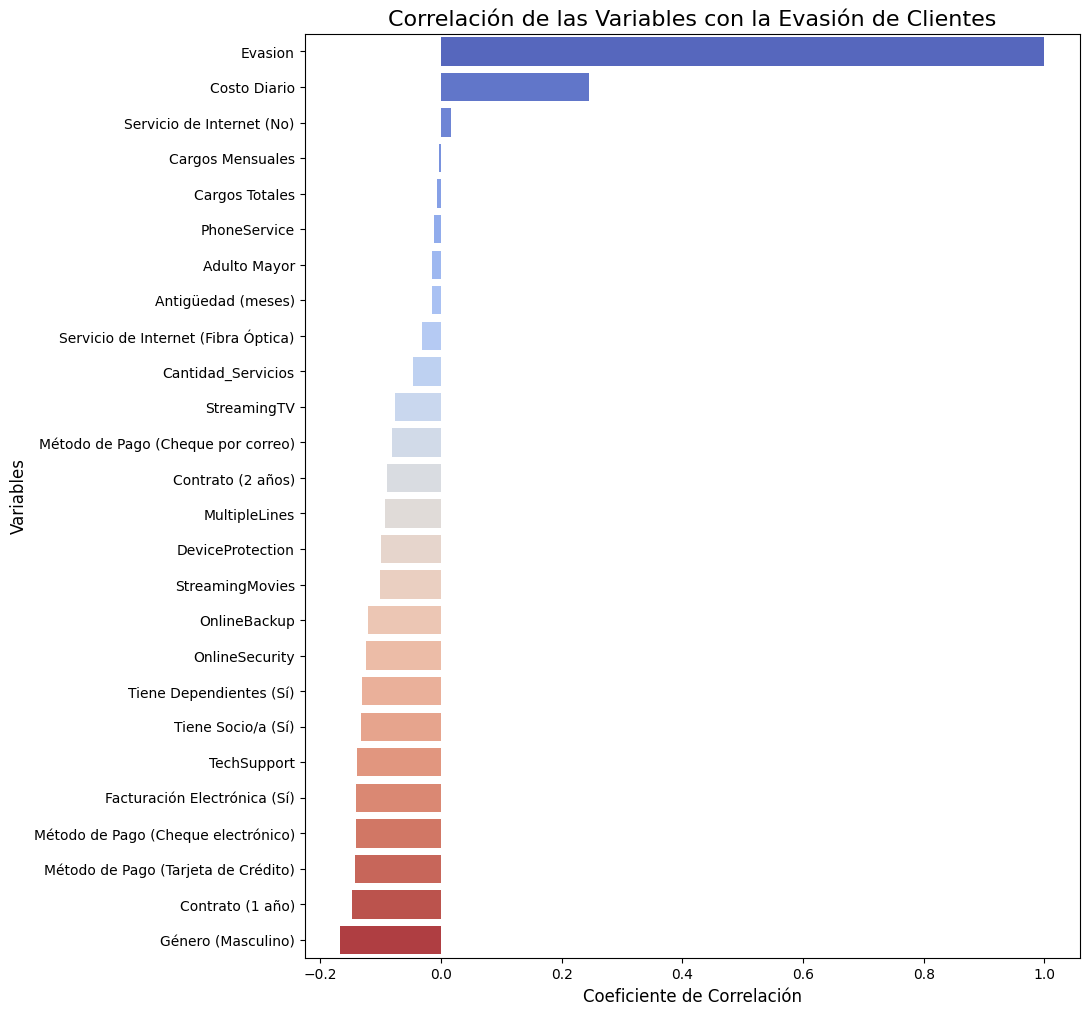

In [28]:
# --- Importación de Librerías para Visualización ---
#
# Se importa seaborn y matplotlib, que son librerías esenciales
# para crear gráficos estadísticos y visualizaciones de datos en Python.
import seaborn as sns
import matplotlib.pyplot as plt

# --- Creación de un DataFrame Balanceado ---
#
# Se unen las características (X_res) y la variable objetivo (y_res) que obtuvimos
# después de aplicar SMOTE. Esto es necesario para poder calcular la correlación
# de todas las variables contra la columna 'Evasion'.
df_resampled = pd.concat([y_res, X_res], axis=1)

# --- Cálculo de la Matriz de Correlación ---
#
# Se calcula la matriz de correlación de Pearson para todo el DataFrame.
# Luego, seleccionamos únicamente la columna 'Evasion' para ver su relación
# con todas las demás variables y la ordenamos de mayor a menor.
correlation_evasion = df_resampled.corr()['Evasion'].sort_values(ascending=False)

# --- Traducción de Nombres de Variables para el Gráfico ---
#
# Se crea un diccionario para traducir los nombres técnicos de las columnas a un formato
# más legible y en español. Esto hará que el gráfico final sea más fácil de interpretar.
traducciones = {
    'Contract_Two year': 'Contrato (2 años)',
    'tenure': 'Antigüedad (meses)',
    'OnlineSecurity_No internet service': 'Seguridad Online (Sin Internet)',
    'TechSupport_No internet service': 'Soporte Técnico (Sin Internet)',
    'DeviceProtection_No internet service': 'Protección Dispositivo (Sin Internet)',
    'OnlineBackup_No internet service': 'Respaldo Online (Sin Internet)',
    'StreamingTV_No internet service': 'Streaming TV (Sin Internet)',
    'StreamingMovies_No internet service': 'Streaming Películas (Sin Internet)',
    'InternetService_No': 'Servicio de Internet (No)',
    'Contract_One year': 'Contrato (1 año)',
    'Charges.Total': 'Cargos Totales',
    'PaymentMethod_Mailed check': 'Método de Pago (Cheque por correo)',
    'PaymentMethod_Credit card (automatic)': 'Método de Pago (Tarjeta de Crédito)',
    'gender_Male': 'Género (Masculino)',
    'Partner_Yes': 'Tiene Socio/a (Sí)',
    'MultipleLines_No phone service': 'Múltiples Líneas (Sin Teléfono)',
    'MultipleLines_Yes': 'Múltiples Líneas (Sí)',
    'Dependents_Yes': 'Tiene Dependientes (Sí)',
    'PhoneService_Yes': 'Servicio Telefónico (Sí)',
    'OnlineBackup_Yes': 'Respaldo Online (Sí)',
    'DeviceProtection_Yes': 'Protección Dispositivo (Sí)',
    'TechSupport_Yes': 'Soporte Técnico (Sí)',
    'StreamingTV_Yes': 'Streaming TV (Sí)',
    'StreamingMovies_Yes': 'Streaming Películas (Sí)',
    'PaperlessBilling_Yes': 'Facturación Electrónica (Sí)',
    'SeniorCitizen': 'Adulto Mayor',
    'Charges.Monthly': 'Cargos Mensuales',
    'Costo_Diario': 'Costo Diario',
    'OnlineSecurity_Yes': 'Seguridad Online (Sí)',
    'PaymentMethod_Electronic check': 'Método de Pago (Cheque electrónico)',
    'InternetService_Fiber optic': 'Servicio de Internet (Fibra Óptica)'
}

# Se aplica el renombrado al índice de nuestra serie de correlaciones.
correlation_evasion.rename(index=traducciones, inplace=True)


# --- Creación del Gráfico de Correlación ---
#
# Se configura el tamaño de la figura para que el gráfico sea legible.
plt.figure(figsize=(10, 12))

# Se crea un gráfico de barras con seaborn.
# Para aplicar la paleta de colores correctamente y evitar advertencias de versiones futuras,
# se asigna el índice (nombres de variables) a 'hue' y se desactiva la leyenda.
sns.barplot(x=correlation_evasion.values, y=correlation_evasion.index,
            hue=correlation_evasion.index, palette='coolwarm', legend=False)

# Se añaden el título y las etiquetas para que el gráfico sea fácil de interpretar.
plt.title('Correlación de las Variables con la Evasión de Clientes', fontsize=16)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Se muestra el gráfico.
plt.show()

Análisis Dirigido

Descripción

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

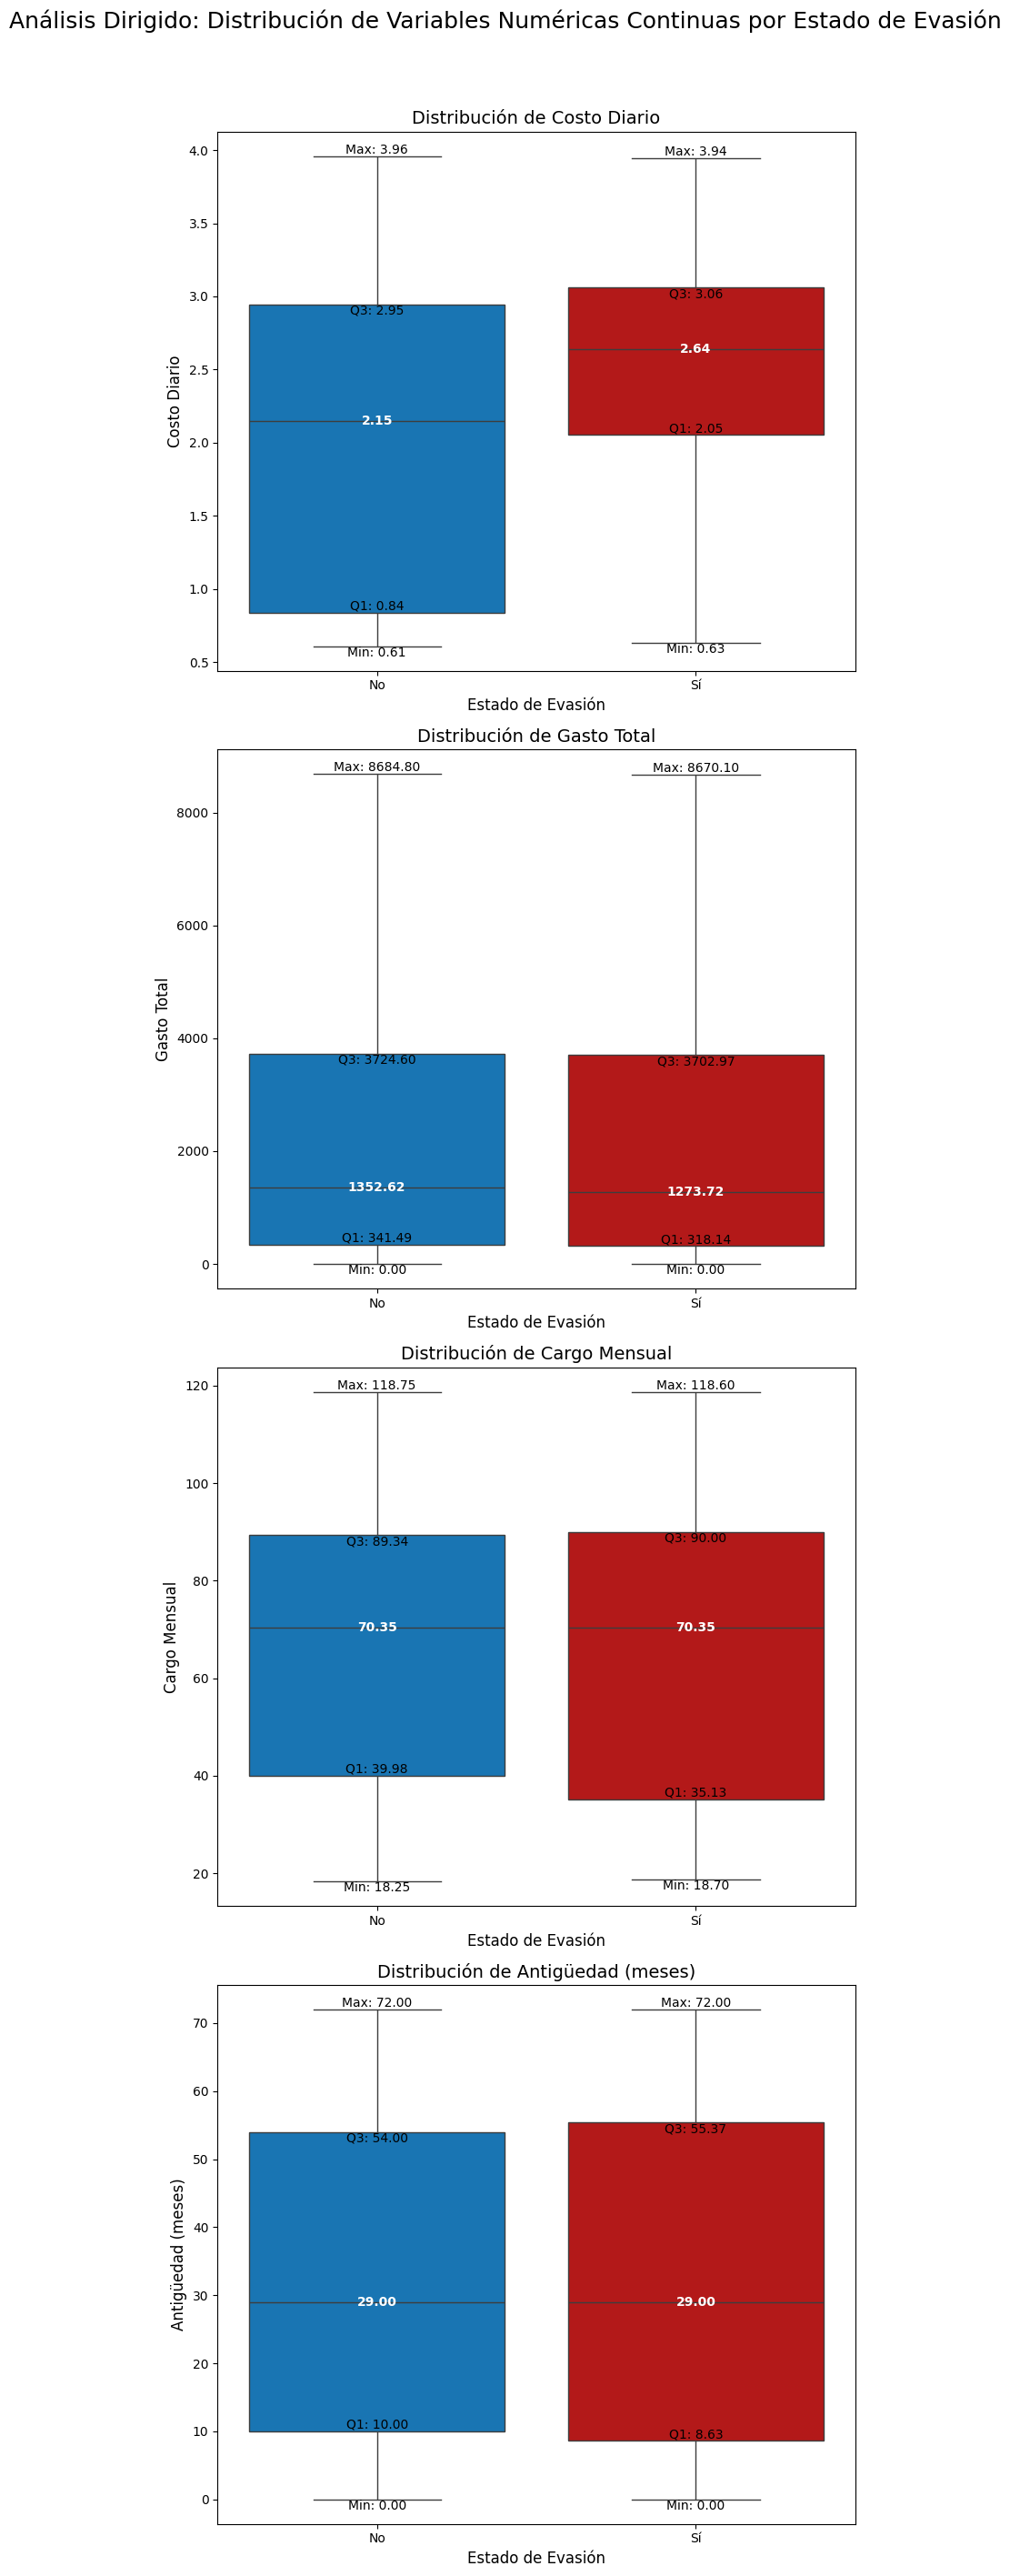

In [32]:
# --- Lista de Variables a Analizar y sus Traducciones ---
#
# Se definen las variables continuas que se van a graficar en el orden solicitado
# y un diccionario para sus nombres en español, que se usarán en los gráficos.
variables_a_graficar = [
    'Costo_Diario',
    'Charges.Total',
    'Charges.Monthly',
    'tenure'
]

traducciones = {
    'Costo_Diario': 'Costo Diario',
    'Charges.Total': 'Gasto Total',
    'Charges.Monthly': 'Cargo Mensual',
    'tenure': 'Antigüedad (meses)'
}

# --- Creación de una Figura con Múltiples Subgráficos ---
#
# Se crea una única figura que contendrá 4 subgráficos (axes) organizados verticalmente.
# Esto asegura que todos los gráficos compartan el mismo ancho y mantengan la uniformidad.
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 28))
fig.suptitle('Análisis Dirigido: Distribución de Variables Numéricas Continuas por Estado de Evasión', fontsize=18, y=1.01)

# --- Bucle para Generar los Gráficos ---
#
# Se itera sobre la lista de variables para crear un boxplot anotado para cada una,
# colocando cada gráfico en su respectivo eje (ax).
for idx, var in enumerate(variables_a_graficar):
    ax = axes[idx]

    # Se crea el boxplot con la paleta de colores personalizada (azul y rojo).
    sns.boxplot(x='Evasion', y=var, data=df_resampled,
                palette={0: '#007ACC', 1: '#CC0000'}, hue='Evasion', ax=ax)

    # Se recorren las dos categorías de Evasión (0 y 1) para añadir las anotaciones.
    for i in [0, 1]:
        subset = df_resampled[df_resampled['Evasion'] == i][var]
        q1, median, q3 = subset.quantile(0.25), subset.quantile(0.50), subset.quantile(0.75)
        iqr = q3 - q1
        min_val = subset[subset >= q1 - 1.5 * iqr].min()
        max_val = subset[subset <= q3 + 1.5 * iqr].max()

        # Se añade el texto de cada estadística sobre el gráfico.
        ax.text(i, median, f'{median:.2f}', ha='center', va='center', color='white', fontweight='bold')
        ax.text(i, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', color='black')
        ax.text(i, q3, f'Q3: {q3:.2f}', ha='center', va='top', color='black')
        ax.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='top', color='black')
        ax.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='bottom', color='black')

    # Se configuran los títulos y etiquetas del gráfico actual.
    titulo_traducido = traducciones[var]
    ax.set_title(f'Distribución de {titulo_traducido}', fontsize=14)
    ax.set_xlabel('Estado de Evasión', fontsize=12)
    ax.set_ylabel(titulo_traducido, fontsize=12)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])
    ax.get_legend().remove()

# Se ajusta el layout para evitar que los títulos y etiquetas se superpongan.
plt.tight_layout(rect=[0, 0, 1, 0.99])
# Se muestra la figura con los cuatro gráficos.
plt.show()

#🤖 Modelado Predictivo

Separación de Datos

Descripción

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [33]:
# --- Importación de la Librería Necesaria ---
#
# Se importa la función train_test_split de la librería scikit-learn,
# que nos permitirá dividir el dataset de forma sencilla y estandarizada.
from sklearn.model_selection import train_test_split

# --- Separación de Datos en Entrenamiento y Prueba ---
#
# Se dividen las características (X_scaled_df) y la variable objetivo (y_res)
# en conjuntos de entrenamiento y de prueba.
#   - test_size=0.3: Especifica que el 30% de los datos se destinará para el conjunto de prueba.
#   - random_state=42: Asegura que la división sea siempre la misma cada vez que se ejecute el código,
#     lo que garantiza la reproducibilidad de los resultados.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df,
    y_res,
    test_size=0.3,
    random_state=42
)

# --- Verificación de la División ---
#
# Se imprimen las dimensiones (forma) de los conjuntos de datos generados
# para confirmar que la división se realizó correctamente.
print("Dimensiones del conjunto de entrenamiento (características):", X_train.shape)
print("Dimensiones del conjunto de prueba (características):", X_test.shape)
print("Dimensiones del conjunto de entrenamiento (objetivo):", y_train.shape)
print("Dimensiones del conjunto de prueba (objetivo):", y_test.shape)

Dimensiones del conjunto de entrenamiento (características): (7243, 25)
Dimensiones del conjunto de prueba (características): (3105, 25)
Dimensiones del conjunto de entrenamiento (objetivo): (7243,)
Dimensiones del conjunto de prueba (objetivo): (3105,)


Creación de Modelos

Descripción

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [34]:
# --- Importación de las Librerías Necesarias ---
#
# Se importan los modelos de Regresión Logística, Random Forest, SVM (SVC) y Red Neuronal (MLPClassifier),
# además de las herramientas para dividir y estandarizar los datos.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# --- Preparación de los dos Conjuntos de Datos ---
#
# Para comparar los modelos de forma justa, necesitamos dos versiones de los datos:
# 1. df_resampled: Datos balanceados y codificados, pero NO estandarizados.
# 2. X_scaled_df: Datos balanceados, codificados Y ESTANDARIZADOS.

# a) Datos NO estandarizados
df_resampled = pd.concat([y_res, X_res], axis=1)
X_no_scaled = df_resampled.drop('Evasion', axis=1)
y_no_scaled = df_resampled['Evasion']

# b) Datos ESTANDARIZADOS
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_res.columns)


# --- Separación de Datos para Ambos Escenarios ---
#
# Se dividen ambos conjuntos de datos en entrenamiento y prueba.

# a) División para datos NO estandarizados
X_train, X_test, y_train, y_test = train_test_split(
    X_no_scaled, y_no_scaled, test_size=0.3, random_state=42
)

# b) División para datos ESTANDARIZADOS
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled_df, y_no_scaled, test_size=0.3, random_state=42
)


# --- Modelo 1: Regresión Logística (con datos estandarizados) ---
#
# Se crea y entrena el modelo de Regresión Logística.
# Este modelo necesita los datos estandarizados para que los coeficientes
# se calculen correctamente, sin sesgos por la magnitud de las variables.
print("--- Entrenando Modelo 1: Regresión Logística ---")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_scaled)
print("Modelo de Regresión Logística entrenado exitosamente.")
print("-" * 50)


# --- Modelo 2: Random Forest (con datos no estandarizados) ---
#
# Se crea y entrena el modelo de Random Forest.
# Al ser un modelo basado en árboles, no es sensible a la escala de los datos,
# por lo que podemos usar el conjunto de entrenamiento sin estandarizar.
print("\n--- Entrenando Modelo 2: Random Forest ---")
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
print("Modelo de Random Forest entrenado exitosamente.")
print("-" * 50)


# --- Modelo 3: Support Vector Machine (con datos estandarizados) ---
#
# Se crea y entrena el modelo SVM (Support Vector Machine).
# Este modelo, basado en la búsqueda del hiperplano óptimo de separación,
# es sensible a la escala de los datos, por lo que se utilizan los datos estandarizados.
print("\n--- Entrenando Modelo 3: Support Vector Machine (SVM) ---")
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train_scaled)
print("Modelo SVM entrenado exitosamente.")
print("-" * 50)


# --- Modelo 4: Red Neuronal (MLP Classifier) (con datos estandarizados) ---
#
# Se crea y entrena una red neuronal simple (Perceptrón Multicapa).
# Las redes neuronales convergen de manera más eficiente y estable cuando
# los datos de entrada están estandarizados.
print("\n--- Entrenando Modelo 4: Red Neuronal (MLP) ---")
nn_model = MLPClassifier(random_state=42, max_iter=500) # Se aumenta max_iter para asegurar la convergencia
nn_model.fit(X_train_scaled, y_train_scaled)
print("Modelo de Red Neuronal entrenado exitosamente.")

--- Entrenando Modelo 1: Regresión Logística ---
Modelo de Regresión Logística entrenado exitosamente.
--------------------------------------------------

--- Entrenando Modelo 2: Random Forest ---
Modelo de Random Forest entrenado exitosamente.
--------------------------------------------------

--- Entrenando Modelo 3: Support Vector Machine (SVM) ---
Modelo SVM entrenado exitosamente.
--------------------------------------------------

--- Entrenando Modelo 4: Red Neuronal (MLP) ---
Modelo de Red Neuronal entrenado exitosamente.


Evaluación de los Modelos

Descripción

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

--- Métricas de Evaluación: Regresión Logística ---
              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76      1588
         1.0       0.76      0.66      0.71      1517

    accuracy                           0.73      3105
   macro avg       0.74      0.73      0.73      3105
weighted avg       0.74      0.73      0.73      3105

-------------------------------------------------------

--- Matriz de Confusión: Regresión Logística ---


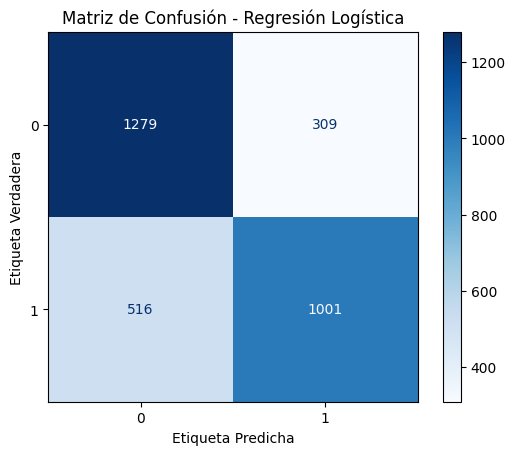


--- Métricas de Evaluación: Random Forest ---
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78      1588
         1.0       0.78      0.73      0.75      1517

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105

-------------------------------------------------------

--- Matriz de Confusión: Random Forest ---


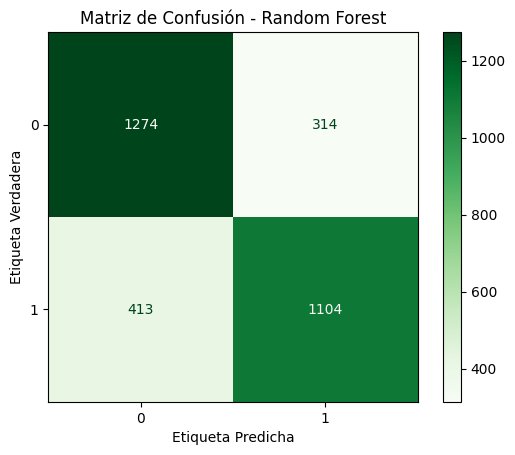


--- Métricas de Evaluación: Support Vector Machine (SVM) ---
              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79      1588
         1.0       0.81      0.67      0.73      1517

    accuracy                           0.76      3105
   macro avg       0.77      0.76      0.76      3105
weighted avg       0.77      0.76      0.76      3105

-------------------------------------------------------

--- Matriz de Confusión: SVM ---


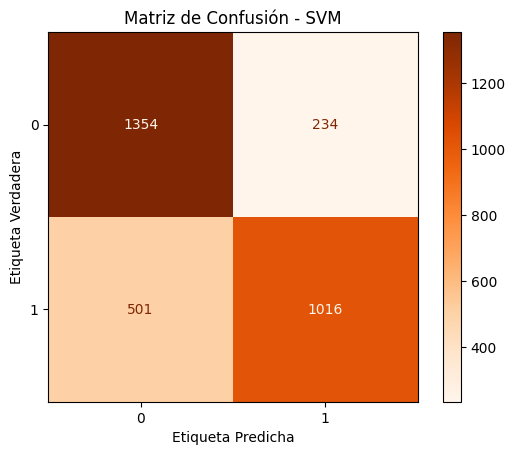


--- Métricas de Evaluación: Red Neuronal (MLP) ---
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74      1588
         1.0       0.73      0.71      0.72      1517

    accuracy                           0.73      3105
   macro avg       0.73      0.73      0.73      3105
weighted avg       0.73      0.73      0.73      3105

-------------------------------------------------------

--- Matriz de Confusión: Red Neuronal (MLP) ---


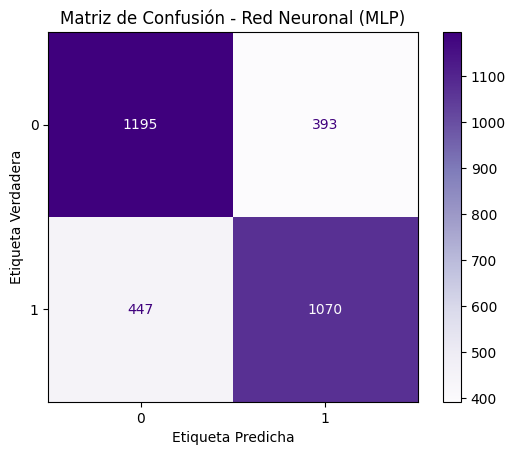


--- Comparación de Exactitud (Entrenamiento vs. Prueba) ---
Regresión Logística   - Entrenamiento: 0.7425, Prueba: 0.7343
Random Forest         - Entrenamiento: 0.9999, Prueba: 0.7659
SVM                   - Entrenamiento: 0.7962, Prueba: 0.7633
Red Neuronal (MLP)    - Entrenamiento: 0.8880, Prueba: 0.7295


In [35]:
# --- Importación de las Librerías para Métricas ---
#
# Se importan las funciones necesarias de scikit-learn para calcular las métricas
# y matplotlib para la visualización.
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# --- Realización de Predicciones ---
#
# En este paso, cada modelo entrenado utiliza el método .predict() sobre el conjunto de datos de prueba.
# Este conjunto de prueba ('X_test') contiene datos que el modelo nunca ha visto, lo que permite
# evaluar su capacidad de generalización.
# Es crucial usar el conjunto de datos escalado ('X_test_scaled') para los modelos que lo requieren
# (Regresión Logística, SVM, Red Neuronal) para que las predicciones sean consistentes con el entrenamiento.
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rand_forest = rand_forest.predict(X_test)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_nn = nn_model.predict(X_test_scaled)


# --- Evaluación del Modelo 1: Regresión Logística ---
#
# Se evalúa el rendimiento del modelo de Regresión Logística.
print("--- Métricas de Evaluación: Regresión Logística ---")
# El reporte de clasificación (classification_report) desglosa las métricas clave:
# - Precision: ¿Qué proporción de identificados como "Sí" eran realmente "Sí"?
# - Recall: ¿Qué proporción de los "Sí" reales fueron identificados correctamente?
# - F1-score: Media armónica de precisión y recall.
# Se comparan las etiquetas verdaderas (y_test) con las predichas por el modelo (y_pred_log_reg).
print(classification_report(y_test, y_pred_log_reg))
print("-" * 55)

# Se genera la matriz de confusión, una tabla que visualiza los aciertos y errores.
# Ayuda a ver cuántos clientes que cancelaron fueron detectados (Verdaderos Positivos) y
# cuántos no fueron detectados (Falsos Negativos), que es el error más costoso.
print("\n--- Matriz de Confusión: Regresión Logística ---")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp_log_reg.plot(cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Etiqueta Predicha') # Etiqueta en español
plt.ylabel('Etiqueta Verdadera') # Etiqueta en español
plt.show()


# --- Evaluación del Modelo 2: Random Forest ---
#
# Se repite el mismo proceso de evaluación para el modelo de Random Forest.
print("\n--- Métricas de Evaluación: Random Forest ---")
print(classification_report(y_test, y_pred_rand_forest))
print("-" * 55)

# Se genera su respectiva matriz de confusión para un análisis visual.
print("\n--- Matriz de Confusión: Random Forest ---")
cm_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)
disp_rand_forest = ConfusionMatrixDisplay(confusion_matrix=cm_rand_forest)
disp_rand_forest.plot(cmap='Greens')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Etiqueta Predicha') # Etiqueta en español
plt.ylabel('Etiqueta Verdadera') # Etiqueta en español
plt.show()


# --- Evaluación del Modelo 3: Support Vector Machine (SVM) ---
#
# Se realiza la evaluación para el modelo SVM.
print("\n--- Métricas de Evaluación: Support Vector Machine (SVM) ---")
print(classification_report(y_test, y_pred_svm))
print("-" * 55)

# Se genera la matriz de confusión para el modelo SVM.
print("\n--- Matriz de Confusión: SVM ---")
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Oranges')
plt.title('Matriz de Confusión - SVM')
plt.xlabel('Etiqueta Predicha') # Etiqueta en español
plt.ylabel('Etiqueta Verdadera') # Etiqueta en español
plt.show()


# --- Evaluación del Modelo 4: Red Neuronal (MLP) ---
#
# Se realiza la evaluación para el modelo de Red Neuronal.
print("\n--- Métricas de Evaluación: Red Neuronal (MLP) ---")
print(classification_report(y_test, y_pred_nn))
print("-" * 55)

# Se genera la matriz de confusión para la Red Neuronal.
print("\n--- Matriz de Confusión: Red Neuronal (MLP) ---")
cm_nn = confusion_matrix(y_test, y_pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp_nn.plot(cmap='Purples')
plt.title('Matriz de Confusión - Red Neuronal (MLP)')
plt.xlabel('Etiqueta Predicha') # Etiqueta en español
plt.ylabel('Etiqueta Verdadera') # Etiqueta en español
plt.show()


# --- Análisis de Overfitting / Underfitting (para los 4 modelos) ---
#
# Este paso es fundamental para verificar si los modelos han "memorizado" los datos de entrenamiento
# (overfitting) o si son demasiado simples (underfitting). Se compara el rendimiento en los
# datos de entrenamiento con el rendimiento en los datos de prueba.
# Un buen modelo debe tener rendimientos similares en ambos conjuntos.

# Se calcula la exactitud (accuracy) de cada modelo tanto en el conjunto de entrenamiento como en el de prueba.
log_reg_train_acc = accuracy_score(y_train, log_reg.predict(X_train_scaled))
log_reg_test_acc = accuracy_score(y_test, y_pred_log_reg)

rand_forest_train_acc = accuracy_score(y_train, rand_forest.predict(X_train))
rand_forest_test_acc = accuracy_score(y_test, y_pred_rand_forest)

svm_train_acc = accuracy_score(y_train, svm_model.predict(X_train_scaled))
svm_test_acc = accuracy_score(y_test, y_pred_svm)

nn_train_acc = accuracy_score(y_train, nn_model.predict(X_train_scaled))
nn_test_acc = accuracy_score(y_test, y_pred_nn)

# Se imprimen los resultados de la comparación de manera formateada.
# Una gran diferencia entre "Entrenamiento" y "Prueba" sugiere overfitting.
# Un rendimiento bajo en ambos sugiere underfitting.
print("\n--- Comparación de Exactitud (Entrenamiento vs. Prueba) ---")
print(f"Regresión Logística   - Entrenamiento: {log_reg_train_acc:.4f}, Prueba: {log_reg_test_acc:.4f}")
print(f"Random Forest         - Entrenamiento: {rand_forest_train_acc:.4f}, Prueba: {rand_forest_test_acc:.4f}")
print(f"SVM                   - Entrenamiento: {svm_train_acc:.4f}, Prueba: {svm_test_acc:.4f}")
print(f"Red Neuronal (MLP)    - Entrenamiento: {nn_train_acc:.4f}, Prueba: {nn_test_acc:.4f}")

#📋 Interpretación y Conclusiones

Análisis de la Importancia de las Variables

Descripción

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

Basado en las métricas de la etapa anterior, el modelo Random Forest demostró el mejor rendimiento predictivo en los datos de prueba (mayor F1-Score y Recall), a pesar de mostrar signos de overfitting. La Regresión Logística y el SVM mostraron un rendimiento sólido y buena generalización. La Red Neuronal tuvo un desempeño intermedio.

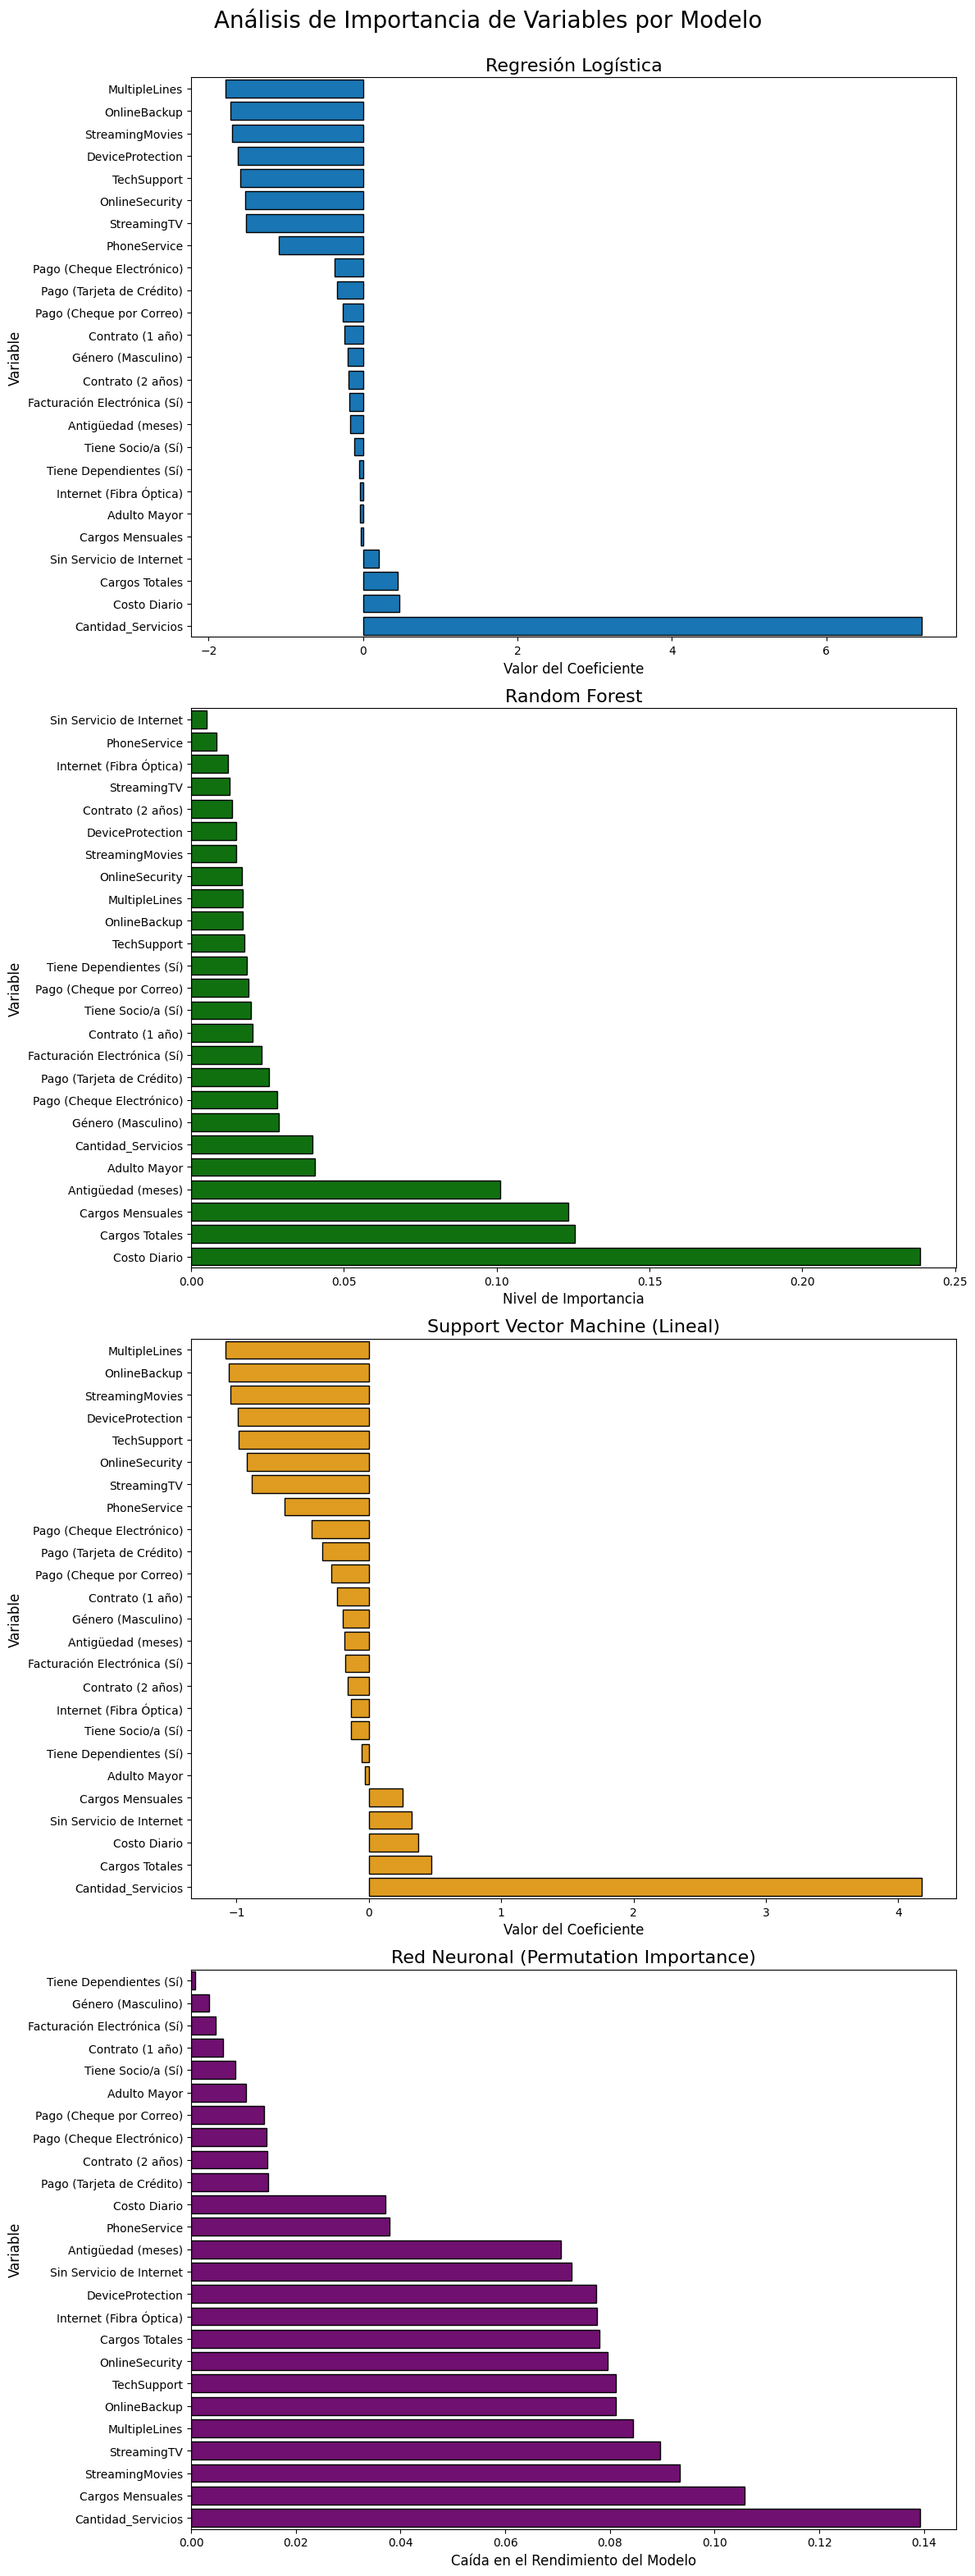

In [36]:
# --- Importación de Librerías Adicionales ---
#
# Se importa la función permutation_importance para analizar modelos complejos como las redes neuronales,
# y numpy para operaciones numéricas.
from sklearn.inspection import permutation_importance
import numpy as np

# --- Diccionario de Traducciones para los Gráficos ---
#
# Se crea un diccionario para traducir los nombres técnicos de las columnas a un formato
# más legible y en español, que se usará en las etiquetas de los gráficos.
traducciones = {
    'Contract_Two year': 'Contrato (2 años)', 'tenure': 'Antigüedad (meses)',
    'InternetService_No': 'Sin Servicio de Internet', 'PaymentMethod_Electronic check': 'Pago (Cheque Electrónico)',
    'PaperlessBilling_Yes': 'Facturación Electrónica (Sí)', 'Charges.Total': 'Cargos Totales',
    'Charges.Monthly': 'Cargos Mensuales', 'Costo_Diario': 'Costo Diario',
    'InternetService_Fiber optic': 'Internet (Fibra Óptica)', 'PaymentMethod_Mailed check': 'Pago (Cheque por Correo)',
    'PaymentMethod_Credit card (automatic)': 'Pago (Tarjeta de Crédito)', 'Contract_One year': 'Contrato (1 año)',
    'SeniorCitizen': 'Adulto Mayor', 'Partner_Yes': 'Tiene Socio/a (Sí)',
    'Dependents_Yes': 'Tiene Dependientes (Sí)', 'MultipleLines_Yes': 'Múltiples Líneas (Sí)',
    'StreamingMovies_Yes': 'Streaming Películas (Sí)', 'StreamingTV_Yes': 'Streaming TV (Sí)',
    'DeviceProtection_Yes': 'Protección Dispositivo (Sí)', 'OnlineBackup_Yes': 'Respaldo Online (Sí)',
    'TechSupport_Yes': 'Soporte Técnico (Sí)', 'OnlineSecurity_Yes': 'Seguridad Online (Sí)',
    'gender_Male': 'Género (Masculino)', 'PhoneService_Yes': 'Servicio Telefónico (Sí)',
    'MultipleLines_No phone service': 'Múltiples Líneas (Sin Teléfono)', 'TechSupport_No internet service': 'Soporte Técnico (Sin Internet)',
    'OnlineSecurity_No internet service': 'Seguridad Online (Sin Internet)', 'DeviceProtection_No internet service': 'Protección Dispositivo (Sin Internet)',
    'OnlineBackup_No internet service': 'Respaldo Online (Sin Internet)', 'StreamingTV_No internet service': 'Streaming TV (Sin Internet)',
    'StreamingMovies_No internet service': 'Streaming Películas (Sin Internet)'
}

# --- Creación de una Figura con Múltiples Subgráficos Verticales ---
#
# Se crea una única figura que contendrá 4 subgráficos (axes) organizados en 4 filas y 1 columna.
# El tamaño (figsize) se ajusta para que cada gráfico tenga un buen espacio vertical.
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 32))
fig.suptitle('Análisis de Importancia de Variables por Modelo', fontsize=20)


# --- Gráfico 1: Regresión Logística ---
#
# Se extraen los coeficientes del modelo de Regresión Logística ya entrenado.
# Se asocian con sus nombres de variable y se ordenan para la visualización.
coeficientes = pd.Series(log_reg.coef_[0], index=X_train_scaled.columns).sort_values()
# Se utiliza el diccionario de traducciones para cambiar los nombres de las variables al español.
coeficientes_traducidos = coeficientes.rename(index=traducciones)
# Se genera el gráfico de barras en el primer subgráfico (axes[0]).
sns.barplot(x=coeficientes_traducidos.values, y=coeficientes_traducidos.index, color='#007ACC', edgecolor='black', ax=axes[0])
# Se personalizan los títulos y etiquetas del primer subgráfico.
axes[0].set_title('Regresión Logística', fontsize=16)
axes[0].set_xlabel('Valor del Coeficiente', fontsize=12)
axes[0].set_ylabel('Variable', fontsize=12)


# --- Gráfico 2: Random Forest ---
#
# Se extrae la importancia de cada variable (feature importance) del modelo Random Forest.
# Este valor indica cuánto contribuye cada variable a la predicción del modelo.
importancia_rf = pd.Series(rand_forest.feature_importances_, index=X_train.columns).sort_values()
importancia_rf_traducida = importancia_rf.rename(index=traducciones) # Se traducen los nombres.
# Se genera el gráfico de barras en el segundo subgráfico (axes[1]).
sns.barplot(x=importancia_rf_traducida.values, y=importancia_rf_traducida.index, color='green', edgecolor='black', ax=axes[1])
axes[1].set_title('Random Forest', fontsize=16)
axes[1].set_xlabel('Nivel de Importancia', fontsize=12)
axes[1].set_ylabel('Variable', fontsize=12)


# --- Gráfico 3: SVM (con Kernel Lineal) ---
#
# Para poder interpretar el SVM, se entrena un nuevo modelo con un kernel lineal,
# ya que este tipo de kernel sí expone coeficientes directos.
svm_lineal = SVC(kernel='linear', random_state=42)
svm_lineal.fit(X_train_scaled, y_train)
# Se extraen y ordenan los coeficientes del SVM lineal.
coeficientes_svm = pd.Series(svm_lineal.coef_[0], index=X_train_scaled.columns).sort_values()
coeficientes_svm_traducidos = coeficientes_svm.rename(index=traducciones) # Se traducen los nombres.
# Se genera el gráfico de barras en el tercer subgráfico (axes[2]).
sns.barplot(x=coeficientes_svm_traducidos.values, y=coeficientes_svm_traducidos.index, color='orange', edgecolor='black', ax=axes[2])
axes[2].set_title('Support Vector Machine (Lineal)', fontsize=16)
axes[2].set_xlabel('Valor del Coeficiente', fontsize=12)
axes[2].set_ylabel('Variable', fontsize=12)


# --- Gráfico 4: Red Neuronal (MLP) ---
#
# Para la red neuronal, se utiliza la "Importancia por Permutación", una técnica que mide la importancia
# de una variable evaluando cuánto cae el rendimiento del modelo si esa variable se desordena.
resultado_perm = permutation_importance(nn_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
# Se extrae la importancia media de cada variable y se ordena.
importancia_nn = pd.Series(resultado_perm.importances_mean, index=X_test_scaled.columns).sort_values()
importancia_nn_traducida = importancia_nn.rename(index=traducciones) # Se traducen los nombres.
# Se genera el gráfico de barras en el cuarto subgráfico (axes[3]).
sns.barplot(x=importancia_nn_traducida.values, y=importancia_nn_traducida.index, color='purple', edgecolor='black', ax=axes[3])
axes[3].set_title('Red Neuronal (Permutation Importance)', fontsize=16)
axes[3].set_xlabel('Caída en el Rendimiento del Modelo', fontsize=12)
axes[3].set_ylabel('Variable', fontsize=12)

# --- Ajuste Final y Visualización ---
#
# Se ajusta el layout para que no se superpongan los elementos y se muestra la figura
# que contiene los cuatro gráficos de importancia de variables.
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

####**Interpretación de los Gráficos Resultantes**

Al ejecutar este código, obtendrás cuatro gráficos. Esto es lo que debes observar:

#####**Regresión Logística y SVM Lineal:**

Estos modelos son lineales, lo que permite una interpretación directa de los coeficientes de cada variable.

-  Barras a la derecha (positivas): Son las variables que más aumentan la probabilidad de cancelación. Los resultados del análisis muestran que características como tener Fibra Óptica o pagar con Cheque Electrónico son fuertes impulsores de la evasión.

-  Barras a la izquierda (negativas): Son las variables que más disminuyen la probabilidad de cancelación (es decir, que fomentan la retención). Como era de esperar, la antigüedad (tenure) y los contratos a largo plazo (1 o 2 años) son los factores de retención más importantes.

#####**Explicación del Eje X (Valor del Coeficiente)**

El eje X en estos dos gráficos representa el valor del coeficiente que el modelo le asigna a cada variable. Este valor nos dice dos cosas:

1. *La Dirección del Impacto (el signo +/-):*

-  Un coeficiente positivo significa que la variable está directamente relacionada con la cancelación. A medida que el valor de esa variable aumenta, la probabilidad de que el cliente cancele (Evasion = 1) también aumenta.

-  Un coeficiente negativo significa que la variable está inversamente relacionada con la cancelación. A medida que el valor de esa variable aumenta (por ejemplo, más meses de antigüedad), la probabilidad de que el cliente cancele disminuye.

2. *La Fuerza del Impacto (la magnitud):*

-  El tamaño de la barra (o el valor absoluto del coeficiente) indica qué tan fuerte es ese impacto. Una barra larga (ya sea positiva o negativa) representa una variable que tiene una gran influencia en la predicción del modelo.

#####**Random Forest y Red Neuronal (Permutation Importance):**

Estos modelos son más complejos y no tienen coeficientes directos, por lo que su importancia se mide de otra forma.

-  En estos gráficos, todas las barras serán positivas. La longitud de la barra indica la importancia general de la variable para el modelo, sin importar si el efecto es positivo o negativo.

-  Los resultados muestran que las variables más largas coinciden en gran medida con los extremos de los gráficos anteriores. Variables como la antigüedad, los cargos mensuales y el tipo de contrato son consistentemente las más destacadas, confirmando su alta relevancia.

#####**Explicación del Eje X (Nivel de Importancia)**

El eje X en estos dos gráficos representa el poder predictivo general de cada variable. A diferencia de los coeficientes, estos valores siempre son positivos y se interpretan así:

1. *Random Forest (Nivel de Importancia):*

-  El eje X muestra cuánto contribuye cada variable a la "pureza" de las decisiones dentro de los árboles que componen el bosque. Una barra más larga significa que el modelo depende más de esa variable para clasificar correctamente a los clientes entre los que cancelan y los que no.

2. *Red Neuronal (Caída en el Rendimiento):*

-  En este caso, el eje X muestra cuánto empeora el rendimiento del modelo si se le quita la información de esa variable (desordenándola aleatoriamente). Una barra larga significa que la variable es muy importante, porque sin ella, el modelo pierde mucha de su capacidad predictiva.

-  En ambos casos, una barra más larga significa que la variable es más fundamental para las predicciones del modelo.

# Conclusión

## Informe Detallado de Factores de Cancelación

Basado en el análisis de los datos de **TelecomX_LATAM_2**, hemos identificado varias variables clave que influyen significativamente en la tasa de cancelación de clientes (churn). A continuación, se presenta un informe detallado basado en los hallazgos de los modelos y análisis visuales.

### 1. Variables Categóricas

-   **Tipo de Contrato (Contract)**: Esta es una de las variables más influyentes. Los clientes con **contratos "Mes a Mes"** muestran una tasa de evasión considerablemente más alta en comparación con aquellos con contratos de "Un Año" o "Dos Años". Esto sugiere que los clientes con compromisos a corto plazo son menos leales y más propensos a cancelar el servicio.
-   **Método de Pago (PaymentMethod)**: El método de pago también revela patrones importantes. Los clientes que utilizan **"Cheque Electrónico"** tienen la tasa de cancelación más alta. Esto podría indicar problemas en el proceso de pago, falta de automatización o que este segmento de clientes es inherentemente menos estable.
-   **Género (gender)**: El análisis por género no mostró una diferencia significativa en la tasa de evasión, lo que indica que no es un factor determinante en la cancelación del servicio.

### 2. Variables Numéricas

-   **Antigüedad (tenure)**: Existe una fuerte correlación negativa entre la antigüedad del cliente y la evasión. Los **clientes nuevos (con baja antigüedad)** son mucho más propensos a cancelar. La tasa de churn disminuye drásticamente a medida que el cliente permanece más tiempo con la empresa, estabilizándose después de los primeros meses.
-   **Cargos Mensuales y Diarios (Charges.Monthly / Costo_Diario)**: Se observa una correlación positiva entre los cargos mensuales/diarios y la evasión. Los clientes que pagan **tarifas mensuales más altas** tienden a cancelar más. Esto es especialmente notorio en clientes con servicios de mayor costo, como la fibra óptica.
-   **Cantidad de Servicios Contratados**: La relación no es lineal, pero se identificó que los clientes con **muy pocos servicios (1-2)** o con una **gran cantidad de servicios (aproximadamente 7)** tienen tasas de evasión más altas. Esto podría deberse a que los clientes con pocos servicios no perciben suficiente valor, mientras que aquellos con muchos servicios pueden sentirse abrumados por el costo total.

---

## Principales Factores de Cancelación y Estrategias de Retención

A partir del informe anterior, los principales factores que impulsan la cancelación de clientes son el **tipo de contrato a corto plazo**, la **baja antigüedad** y los **altos cargos mensuales**.

A continuación, se proponen estrategias de retención específicas para abordar cada uno de estos factores.

### Estrategias de Retención Propuestas

#### **1. Optimizar la Estrategia de Contratos**

* **Factor Principal**: La alta tasa de evasión en clientes con contratos **"Mes a Mes"**.
* **Estrategias Propuestas**:
    * **Incentivos para Contratos a Largo Plazo**: Lanzar campañas de marketing dirigidas a los clientes de "Mes a Mes" ofreciendo descuentos atractivos, servicios adicionales gratuitos o beneficios de lealtad si migran a contratos de uno o dos años.
    * **Programas de Lealtad**: Implementar un programa de recompensas que beneficie a los clientes por su permanencia, especialmente después de superar los hitos críticos de los primeros meses.

#### **2. Mejorar la Experiencia del Cliente Nuevo**

* **Factor Principal**: La alta propensión a la cancelación de **clientes nuevos (baja antigüedad)**.
* **Estrategias Propuestas**:
    * **Onboarding Proactivo**: Crear un programa de onboarding robusto para los primeros 90 días, que incluya seguimiento personalizado, tutoriales sobre los servicios contratados y una oferta de bienvenida especial para asegurar una experiencia inicial positiva.
    * **Soporte Técnico Prioritario**: Ofrecer un canal de soporte técnico prioritario para clientes nuevos para resolver rápidamente cualquier problema técnico que pueda causar frustración y cancelación temprana.

#### **3. Revisar la Estructura de Precios y Pagos**

* **Factor Principal**: La evasión en clientes con **cargos mensuales elevados** y aquellos que pagan con **cheque electrónico**.
* **Estrategias Propuestas**:
    * **Paquetes Personalizados**: Utilizar el análisis de datos para ofrecer paquetes de servicios personalizados y flexibles que se ajusten mejor al presupuesto y a las necesidades del cliente, evitando cargos mensuales excesivos.
    * **Fomentar Pagos Automáticos**: Incentivar el uso de métodos de pago automáticos (transferencia bancaria, tarjeta de crédito) mediante pequeños descuentos o beneficios. Esto no solo reduce la probabilidad de problemas de pago, sino que también aumenta la "adherencia" del cliente al servicio.
    * **Análisis de Valor**: Para los clientes con muchos servicios, comunicar proactivamente el valor que están recibiendo y ofrecer revisiones de cuenta para asegurar que están en el plan más rentable